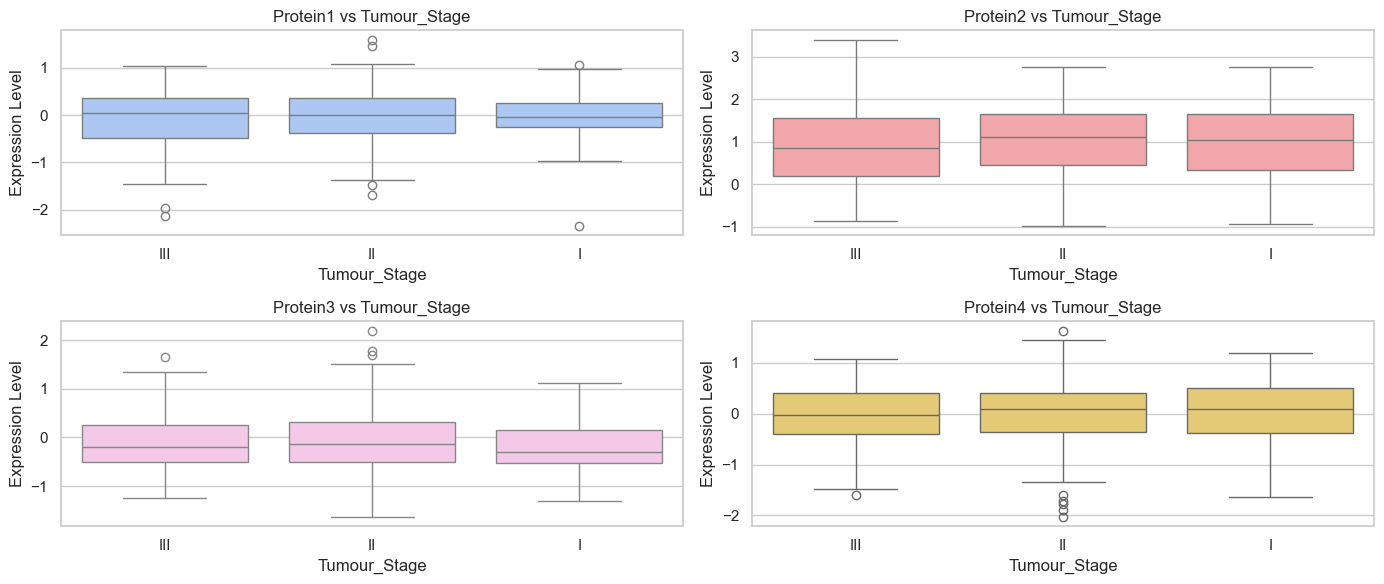

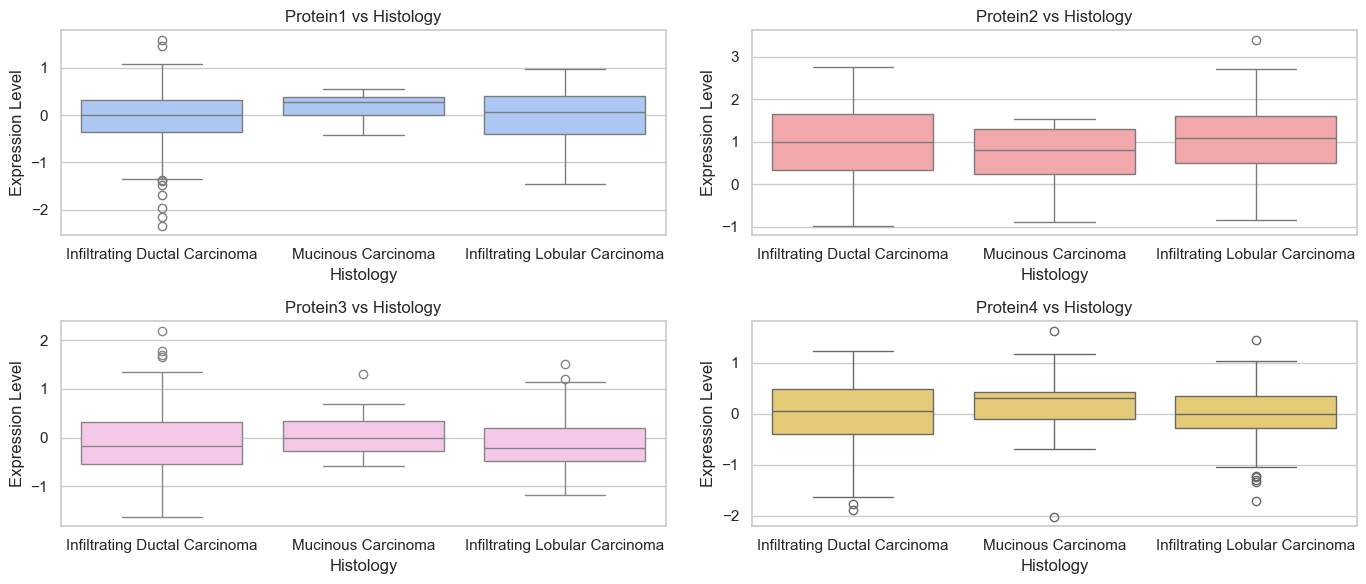

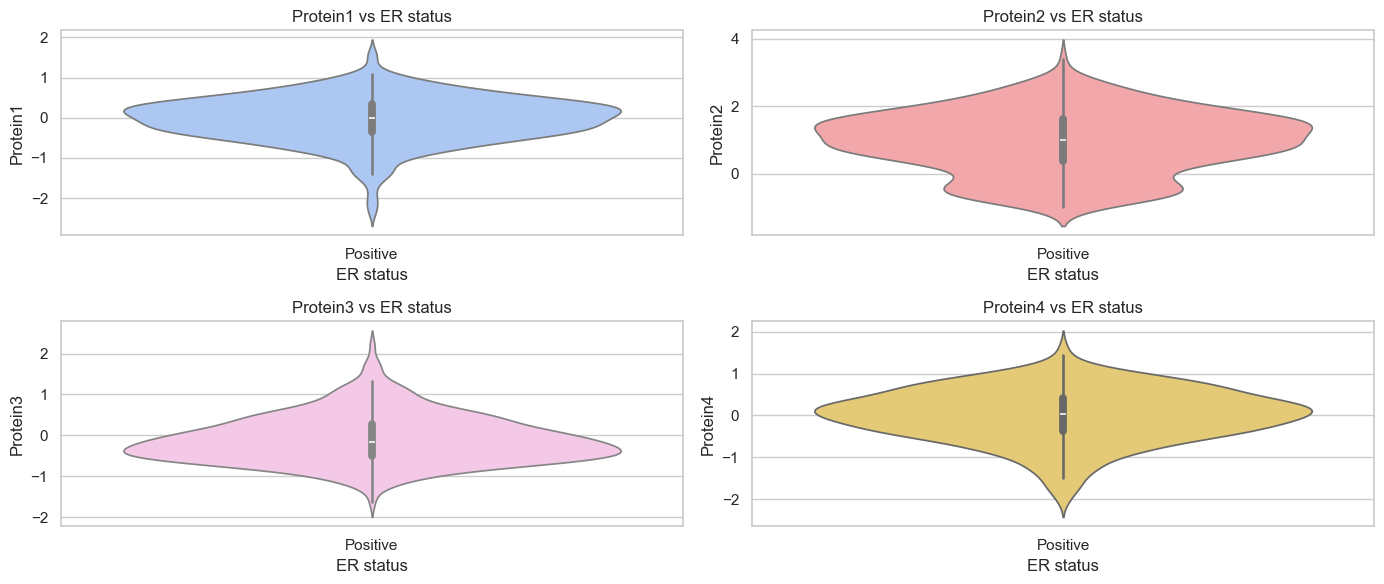

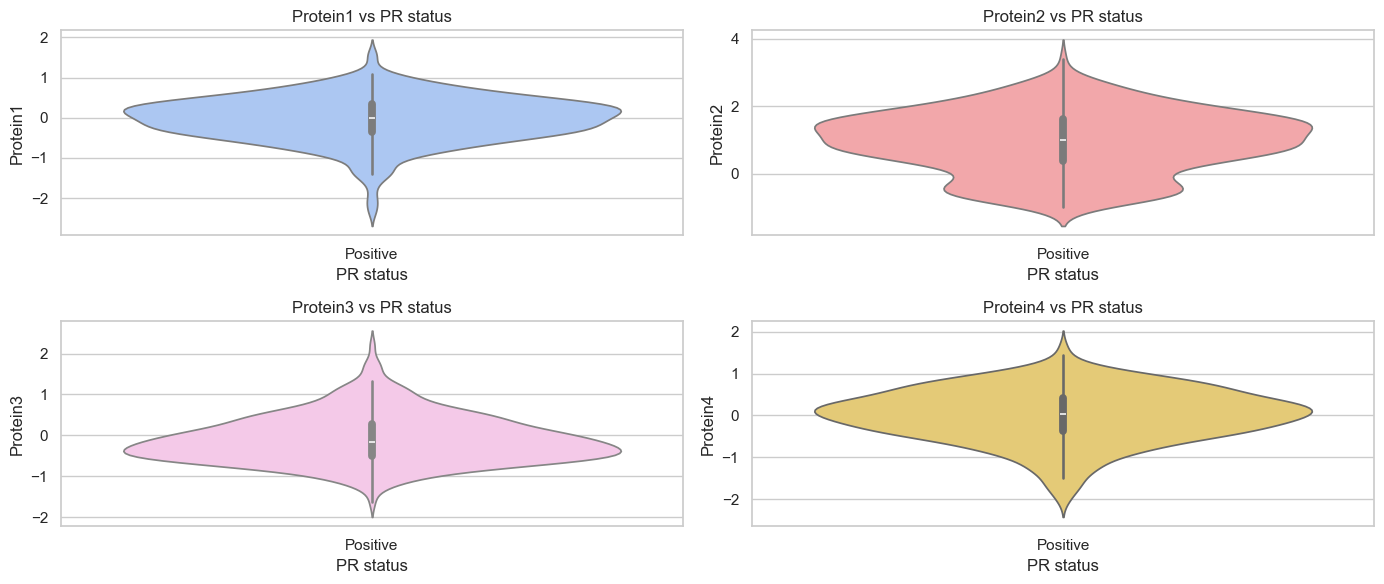

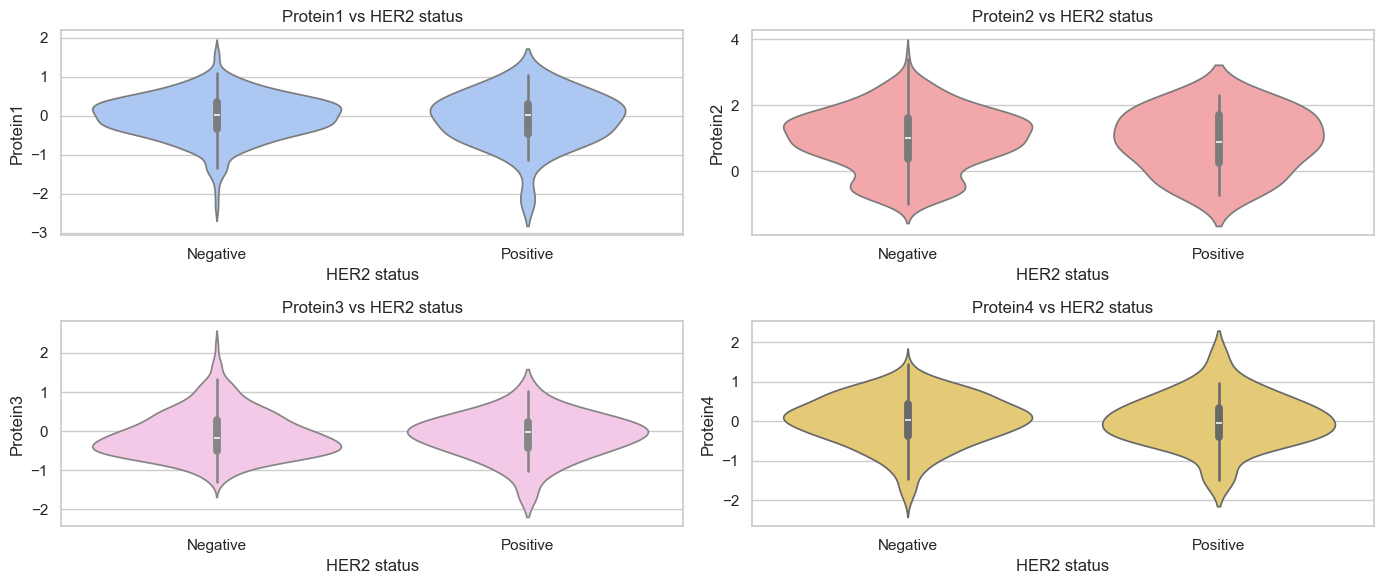

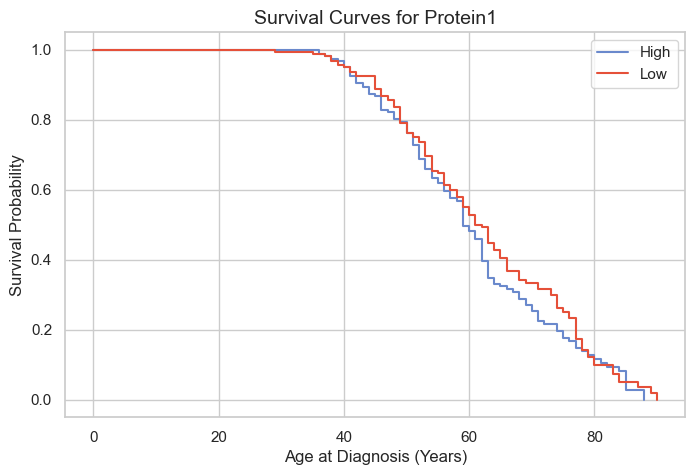

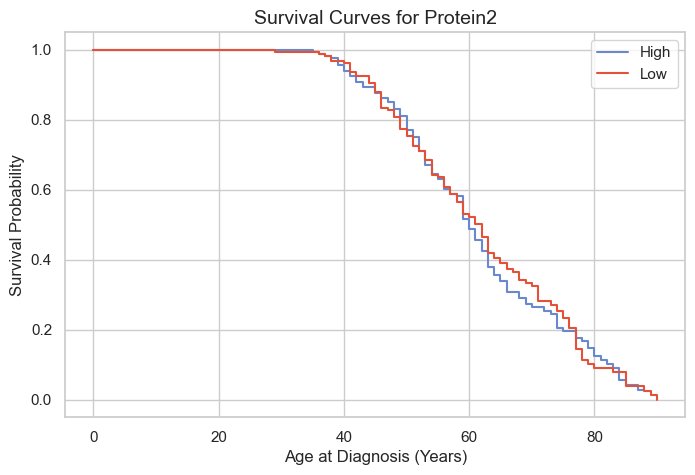

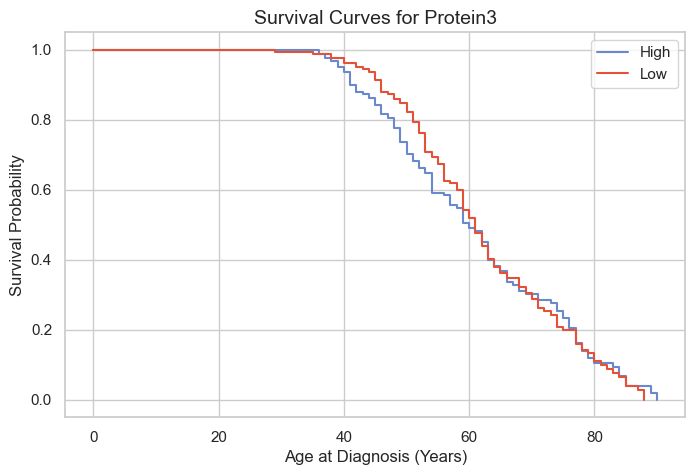

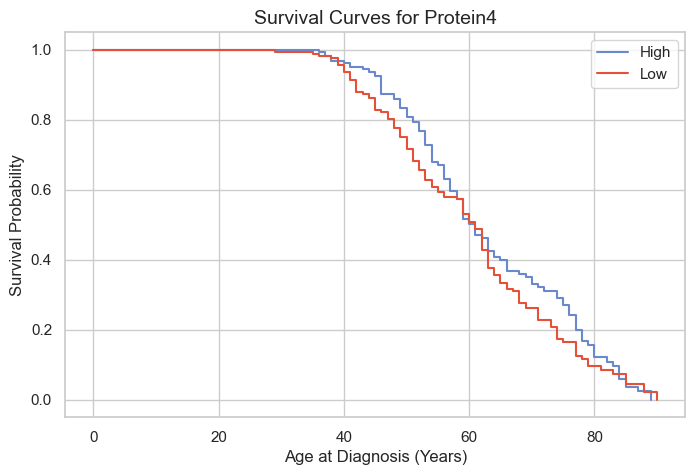

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter
import pandas as pd


df = pd.read_csv("/Users/anushkakondur/hacklytics25/BRCA.csv")

df['Patient_Status_Num'] = df['Patient_Status'].map({'Alive': 1, 'Dead': 0})

sns.set_theme(style="whitegrid")
proteins = ['Protein1', 'Protein2', 'Protein3', 'Protein4']
colors = ['#a1c4fd', '#ff9a9e', '#fbc2eb', '#f6d365']  


def plot_boxplots(feature):
    plt.figure(figsize=(14, 6))
    for i, protein in enumerate(proteins, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(data=df, x=feature, y=protein, color=colors[i - 1])
        plt.title(f'{protein} vs {feature}', fontsize=12)
        plt.xlabel(feature)
        plt.ylabel('Expression Level')
    plt.tight_layout()
    plt.show()


plot_boxplots('Tumour_Stage')
plot_boxplots('Histology')


def plot_violin(feature):
    plt.figure(figsize=(14, 6))
    for i, protein in enumerate(proteins, 1):
        plt.subplot(2, 2, i)
        sns.violinplot(data=df, x=feature, y=protein, color=colors[i - 1])
        plt.title(f'{protein} vs {feature}', fontsize=12)
    plt.tight_layout()
    plt.show()


for status in ['ER status', 'PR status', 'HER2 status']:
    if status in df.columns:
        plot_violin(status)
    else:
        print(f"Warning: '{status}' column not found in dataset.")


def km_plot(protein):
    if 'Patient_Status_Num' not in df.columns or df['Patient_Status_Num'].isnull().all():
        print(f"Warning: 'Patient_Status_Num' is missing or empty. Skipping {protein} survival plot.")
        return

    kmf = KaplanMeierFitter()
    median_expr = df[protein].median()
    df['Protein_Group'] = df[protein].apply(lambda x: 'High' if x >= median_expr else 'Low')

    plt.figure(figsize=(8, 5))
    for group, color in zip(['High', 'Low'], ['#6a89cc', '#e55039']):
        mask = (df['Protein_Group'] == group) & (df['Patient_Status_Num'].notna())
        if mask.sum() > 0:
            kmf.fit(df.loc[mask, 'Age'], event_observed=df.loc[mask, 'Patient_Status_Num'], label=group)
            kmf.plot_survival_function(ci_show=False, color=color)
        else:
            print(f"No valid data for group '{group}' in {protein}.")

    plt.title(f'Survival Curves for {protein}', fontsize=14)
    plt.xlabel('Age at Diagnosis (Years)')
    plt.ylabel('Survival Probability')
    plt.show()


for protein in proteins:
    if protein in df.columns:
        km_plot(protein)
    else:
        print(f"Warning: '{protein}' column not found.")


In [ ]:
from sklearn.model_selection import train_test_split


features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status', 'HER2 status']
target = 'Patient_Status_Num'


df_clean = df.dropna(subset=[target])


df_encoded = pd.get_dummies(df_clean[features], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    df_encoded, 
    df_clean[target], 
    test_size=0.2, 
    random_state=42, 
    stratify=df_clean[target] 
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 256 samples
Testing set size: 65 samples
